-- !pip install tensorflow --upgrade --user

### Importing Required Packages:

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import IFrame
from os import listdir
from os.path import isfile, join

%matplotlib inline

height=350
width=900

def imshow(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
    return

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from collections import Counter

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


### Image Processing:

In [3]:
def process_one_image(image):
    image = cv2.imread(image)
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh_value, threshold_image = cv2.threshold(grayscale_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    contours,_ = cv2.findContours(threshold_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
    x, y, w, h = cv2.boundingRect(sorted_contours[0])
    cropped_label = grayscale_image[y:y+h, x:x+w]
    return cropped_label

In [4]:

def process_all_images(folder_path):
    files = [f for f in listdir(folder_path) if isfile(join(folder_path, f))]
    all_images_processed = [process_one_image(folder_path+'/'+path) for path in files]
    for i in range(0,len(files)-1):
        print(folder_path,files[i])
        plt.imsave(folder_path+ '\\'+'processed_new\\' + files[i],all_images_processed[i])
    return all_images_processed

In [5]:
all_processed_images = process_all_images('ir_patch')

ir_patch 14134_19700101194928245_BHA6172_1_ir_patch.jpg
ir_patch 14135_19700101195631172_BMU2999_1_ir_patch.jpg
ir_patch 14136_19700101195849178_PFF9889_1_ir_patch.jpg
ir_patch 14137_19700101200204933_PTA2105_1_ir_patch.jpg
ir_patch 14140_19700101200442871_CCD7351_1_ir_patch.jpg
ir_patch 14141_19700101200554349_CDI4388_1_ir_patch.jpg
ir_patch 14142_19700101200809055_PCT5326_1_ir_patch.jpg
ir_patch 14143_19700101201336085_728JFW_1_ir_patch.jpg
ir_patch 14144_19700101201837836_PMZ8952_1_ir_patch.jpg
ir_patch 14145_19700101203157953_AGV6998_1_ir_patch.jpg
ir_patch 14146_19700101203223561_PRM4562_1_ir_patch.jpg
ir_patch 14147_19700101203445593_1WF412I_1_ir_patch.jpg
ir_patch 14148_19700101203737523_CBW6194_1_ir_patch.jpg
ir_patch 14149_19700101203916457_PTA3790_1_ir_patch.jpg
ir_patch 14150_19700101204113871_BQF9735_1_ir_patch.jpg
ir_patch 14151_19700101204257094_HW795_1_ir_patch.jpg
ir_patch 14152_19700101204832648_PMA8877_1_ir_patch.jpg
ir_patch 14154_19700101210026888_PAC3211_1_ir_patch

ir_patch 14333_19700101125807059_CF220G_1_ir_patch.jpg
ir_patch 14334_19700101125809567_AHS5950_1_ir_patch.jpg
ir_patch 14335_19700101125831479_PSU2156_1_ir_patch.jpg
ir_patch 14336_19700101130008631_PAG2151_1_ir_patch.jpg
ir_patch 14337_19700101130119911_PDG2472_1_ir_patch.jpg
ir_patch 14338_19700101130122815_PLG4941_1_ir_patch.jpg
ir_patch 14339_19700101130128227_BTE2210_1_ir_patch.jpg
ir_patch 14340_19700101130251848_CCV7608_1_ir_patch.jpg
ir_patch 14341_19700101130310130_BRZ4875_1_ir_patch.jpg
ir_patch 14343_19700101130536848_0083AL2_1_ir_patch.jpg
ir_patch 14344_19700101130537706_0083AL_1_ir_patch.jpg
ir_patch 14345_19700101130646082_AHG2929_1_ir_patch.jpg
ir_patch 14346_19700101130838413_PAA3532_1_ir_patch.jpg
ir_patch 14347_19700101131046321_404YYJ_1_ir_patch.jpg
ir_patch 14348_19700101131056617_BTU1024_1_ir_patch.jpg
ir_patch 14349_19700101131202089_AHK1689_1_ir_patch.jpg
ir_patch 14350_19700101131413164_PGB5090_1_ir_patch.jpg
ir_patch 14351_19700101131414682_PWB7157_1_ir_patch

ir_patch 14551_19700101203511892_PKI6714_1_ir_patch.jpg
ir_patch 14552_19700101203531560_PNTI503_1_ir_patch.jpg
ir_patch 14554_19700101203759532_AHN8474_1_ir_patch.jpg
ir_patch 14555_19700101203945330_AES1322_1_ir_patch.jpg
ir_patch 14556_19700101204516385_DIAZ0_1_ir_patch.jpg
ir_patch 14557_19700101204535723_PJP6063_1_ir_patch.jpg
ir_patch 14558_19700101205020843_BIM2152_1_ir_patch.jpg
ir_patch 14559_19700101205346168_BTV9621_1_ir_patch.jpg
ir_patch 14560_19700101210017284_AHH8792_1_ir_patch.jpg
ir_patch 14562_19700101210601209_BGN8201_1_ir_patch.jpg
ir_patch 14563_19700101210720540_BRY5048_1_ir_patch.jpg
ir_patch 14565_19700101211714935_27SE1_1_ir_patch.jpg
ir_patch 14566_19700101212149825_PMC6509_1_ir_patch.jpg
ir_patch 14567_19700101212150419_PMC6_1_ir_patch.jpg
ir_patch 14568_19700101212424264_WD68JE_1_ir_patch.jpg
ir_patch 14569_19700101212520364_PKV4787_1_ir_patch.jpg
ir_patch 14570_19700101213300582_PAA2535_1_ir_patch.jpg
ir_patch 14571_19700101213626171_PAA7678_1_ir_patch.jpg


ir_patch 14779_19700101133744547_PFA2821_1_ir_patch.jpg
ir_patch 14780_19700101133813257_PMC8882_1_ir_patch.jpg
ir_patch 14781_19700101133935295_CBW1694_1_ir_patch.jpg
ir_patch 14782_19700101134028161_PXW7040_1_ir_patch.jpg
ir_patch 14783_19700101134317384_P1C5248_1_ir_patch.jpg
ir_patch 14784_19700101134421536_BMB6867_1_ir_patch.jpg
ir_patch 14785_19700101134456450_COF5475_1_ir_patch.jpg
ir_patch 14786_19700101134715380_PJF4047_1_ir_patch.jpg
ir_patch 14787_19700101134848967_CCA1588_1_ir_patch.jpg
ir_patch 14788_19700101135111263_BZL2275_1_ir_patch.jpg
ir_patch 14789_19700101135346824_CAT4511_1_ir_patch.jpg
ir_patch 14790_19700101135636444_LJA152U_1_ir_patch.jpg
ir_patch 14793_19700101135911279_CDL2415_1_ir_patch.jpg
ir_patch 14796_19700101140200173_CBN5321_1_ir_patch.jpg
ir_patch 14798_19700101140557838_PKU5138_1_ir_patch.jpg
ir_patch 14799_19700101140813204_BYF6947_1_ir_patch.jpg
ir_patch 14800_19700101140833334_EM1382_1_ir_patch.jpg
ir_patch 14802_19700101140932601_ATE4313_1_ir_pat

ir_patch 15116_19700101222320167_BW221Z_1_ir_patch.jpg
ir_patch 15117_19700101222327229_POG3763_1_ir_patch.jpg
ir_patch 15119_19700101222523982_AHP7615_1_ir_patch.jpg
ir_patch 15121_19700101222637571_PKH1353_1_ir_patch.jpg
ir_patch 15122_19700101222638297_P1353_1_ir_patch.jpg
ir_patch 15181_19700101222859161_W7AIU_1_ir_patch.jpg
ir_patch 15182_19700101222909787_PFB9095_1_ir_patch.jpg
ir_patch 15183_19700101222928531_CBX7974_1_ir_patch.jpg
ir_patch 15184_19700101223005292_PTV2850_1_ir_patch.jpg
ir_patch 15185_19700101223014268_PVM3789_1_ir_patch.jpg
ir_patch 15186_19700101223048390_GA8G53_1_ir_patch.jpg
ir_patch 15188_19700101223054792_PGA8754_1_ir_patch.jpg
ir_patch 15189_19700101223110632_AZB6339_1_ir_patch.jpg
ir_patch 15190_19700101223124624_PFA2242_1_ir_patch.jpg
ir_patch 15192_19700101223155247_PKH1713_1_ir_patch.jpg
ir_patch 15193_19700101223202705_PAB4332_1_ir_patch.jpg
ir_patch 15195_19700101223247519_PHI1585_1_ir_patch.jpg
ir_patch 15196_19700101223323225_CBQ1847_1_ir_patch.jp

ir_patch 15407_19700101131024308_PLG4941_1_ir_patch.jpg
ir_patch 15408_19700101131128922_CCE6569_1_ir_patch.jpg
ir_patch 15409_19700101131134334_PXG5750_1_ir_patch.jpg
ir_patch 15410_19700101131645787_PBD9165_1_ir_patch.jpg
ir_patch 15411_19700101131706973_PWL2646_1_ir_patch.jpg
ir_patch 15412_19700101131751127_BZE4550_1_ir_patch.jpg
ir_patch 15413_19700101132010518_CUSC448_1_ir_patch.jpg
ir_patch 15414_19700101132013752_PJN2481_1_ir_patch.jpg
ir_patch 15415_19700101132050382_PDB1938_1_ir_patch.jpg
ir_patch 15416_19700101132332676_BGE2180_1_ir_patch.jpg
ir_patch 15417_19700101132449829_CBU4783_1_ir_patch.jpg
ir_patch 15418_19700101132450686_CBU4_1_ir_patch.jpg
ir_patch 15420_19700101132619786_API1916_1_ir_patch.jpg
ir_patch 15421_19700101132658396_PAA3532_1_ir_patch.jpg
ir_patch 15422_19700101133027483_PND4768_1_ir_patch.jpg
ir_patch 15423_19700101133031245_CBP9224_1_ir_patch.jpg
ir_patch 15424_19700101133059559_TZ595C_1_ir_patch.jpg
ir_patch 15425_19700101133401125_CBK6972_1_ir_patch.

ir_patch 15647_19700101214410718_CCC2387_1_ir_patch.jpg
ir_patch 15648_19700101214433092_DMC975_1_ir_patch.jpg
ir_patch 15649_19700101214523978_CCB3405_1_ir_patch.jpg
ir_patch 15650_19700101214525232_CCB34_1_ir_patch.jpg
ir_patch 15651_19700101214622388_CCV7920_1_ir_patch.jpg
ir_patch 15652_19700101214733601_CAD4158_1_ir_patch.jpg
ir_patch 15653_19700101214816897_PCZ3445_1_ir_patch.jpg
ir_patch 15654_19700101214933985_PXJ4948_1_ir_patch.jpg
ir_patch 15655_19700101214952860_PKH2275_1_ir_patch.jpg
ir_patch 15656_19700101214953850_PKH22_1_ir_patch.jpg
ir_patch 15657_19700101215047640_PNT2949_1_ir_patch.jpg
ir_patch 15658_19700101215256141_HU6464_1_ir_patch.jpg
ir_patch 15659_19700101215805086_BKY4786_1_ir_patch.jpg
ir_patch 15660_19700101215952863_PFC0781_1_ir_patch.jpg
ir_patch 15661_19700101220014115_CCT9956_1_ir_patch.jpg
ir_patch 15663_19700101220259246_AJG8040_1_ir_patch.jpg
ir_patch 15665_19700101220533158_PSB9864_1_ir_patch.jpg
ir_patch 15666_19700101220550449_ATG2661_1_ir_patch.jp

ir_patch 15988_19700101130502458_BBX4048_1_ir_patch.jpg
ir_patch 15989_19700101130655846_PTV9C_1_ir_patch.jpg
ir_patch 15990_19700101130712016_PDG2633_1_ir_patch.jpg
ir_patch 15991_19700101130729044_PMZ9915_1_ir_patch.jpg
ir_patch 15992_19700101130817224_AED7325_1_ir_patch.jpg
ir_patch 15994_19700101130841578_BYP2660_1_ir_patch.jpg
ir_patch 15995_19700101131356793_PBD9165_1_ir_patch.jpg
ir_patch 15996_19700101131438174_AFP2997_1_ir_patch.jpg
ir_patch 15998_19700101131642980_BBN9437_1_ir_patch.jpg
ir_patch 15999_19700101131718884_ATH4685_1_ir_patch.jpg
ir_patch 16000_19700101131909566_CAY9404_1_ir_patch.jpg
ir_patch 16002_19700101132008107_PJP8823_1_ir_patch.jpg
ir_patch 16004_19700101132036157_CBQ5235_1_ir_patch.jpg
ir_patch 16005_19700101132036751_B05235_1_ir_patch.jpg
ir_patch 16006_19700101132321157_PQ180_1_ir_patch.jpg
ir_patch 16007_19700101132330859_JA727R_1_ir_patch.jpg
ir_patch 16010_19700101132910956_PNF3804_1_ir_patch.jpg
ir_patch 16011_19700101133051605_GL85G2_1_ir_patch.jpg

ir_patch 16215_19700101204811039_LM5130_1_ir_patch.jpg
ir_patch 16216_19700101204838693_CCB5703_1_ir_patch.jpg
ir_patch 16217_19700101204851035_CBE9618_1_ir_patch.jpg
ir_patch 16218_19700101204951623_GL9D09_1_ir_patch.jpg
ir_patch 16221_19700101205301108_BPP8984_1_ir_patch.jpg
ir_patch 16223_19700101205813089_ABG3352_1_ir_patch.jpg
ir_patch 16224_19700101205909849_PTU2006_1_ir_patch.jpg
ir_patch 16225_19700101205912885_7AF969_1_ir_patch.jpg
ir_patch 16226_19700101210011624_UYZ860_1_ir_patch.jpg
ir_patch 16227_19700101210046076_PKI6244_1_ir_patch.jpg
ir_patch 16228_19700101210115446_PLF6350_1_ir_patch.jpg
ir_patch 16229_19700101210144486_KN1754_1_ir_patch.jpg
ir_patch 16232_19700101210306919_J5388_1_ir_patch.jpg
ir_patch 16233_19700101210559971_ED9W73_1_ir_patch.jpg
ir_patch 16234_19700101210847280_BIR0495_1_ir_patch.jpg
ir_patch 16236_19700101211501432_GT471M_1_ir_patch.jpg
ir_patch 16237_19700101211527436_CAY7868_1_ir_patch.jpg
ir_patch 16238_19700101211543210_LM4695_1_ir_patch.jpg
ir

ir_patch 16459_19700101123605492_BVJ8399_1_ir_patch.jpg
ir_patch 16460_19700101123608858_P4336_1_ir_patch.jpg
ir_patch 16462_19700101123613808_PKS3536_1_ir_patch.jpg
ir_patch 16464_19700101123707136_BTF6000_1_ir_patch.jpg
ir_patch 16465_19700101124116813_AFK1689_1_ir_patch.jpg
ir_patch 16466_19700101124152585_BUB4871_1_ir_patch.jpg
ir_patch 16467_19700101124252843_JC2364_1_ir_patch.jpg
ir_patch 16468_19700101124336469_BMW6032_1_ir_patch.jpg
ir_patch 16469_19700101124344719_11CN154_1_ir_patch.jpg
ir_patch 16470_19700101124555596_GL9F17_1_ir_patch.jpg
ir_patch 16471_19700101124624834_PKN2800_1_ir_patch.jpg
ir_patch 16473_19700101124751888_CDS2381_1_ir_patch.jpg
ir_patch 16474_19700101124842444_MTLW452_1_ir_patch.jpg
ir_patch 16475_19700101124902507_CDD9952_1_ir_patch.jpg
ir_patch 16476_19700101124906071_PPA3118_1_ir_patch.jpg
ir_patch 16477_19700101124906995_A3118_1_ir_patch.jpg
ir_patch 16478_19700101124926993_AGT5732_1_ir_patch.jpg
ir_patch 16479_19700101125025931_CBJ6440_1_ir_patch.jp

ir_patch 16634_19700101180325201_CCA6351_1_ir_patch.jpg
ir_patch 16635_19700101180730061_GV18088_1_ir_patch.jpg
ir_patch 16636_19700101181456022_PYF3490_1_ir_patch.jpg
ir_patch 16640_19700101181947412_PFX3641_1_ir_patch.jpg
ir_patch 16641_19700101182643608_BPE1017_1_ir_patch.jpg
ir_patch 16642_19700101182737596_BCY0579_1_ir_patch.jpg
ir_patch 16646_19700101183551341_PKN3500_1_ir_patch.jpg
ir_patch 16647_19700101183650543_TIMKLI_1_ir_patch.jpg
ir_patch 16649_19700101184032831_PNA8367_1_ir_patch.jpg
ir_patch 16650_19700101184334265_PMC454_1_ir_patch.jpg
ir_patch 16651_19700101184714969_CBJ2486_1_ir_patch.jpg
ir_patch 16652_19700101184911392_PXJ5782_1_ir_patch.jpg


In [6]:
all_processed_images[2]

array([[ 33,  33,  32, ...,  77,  54,  41],
       [ 24,  24,  25, ...,  96,  66,  49],
       [ 29,  30,  32, ..., 106,  72,  51],
       ...,
       [ 41,  84, 147, ...,  32,  31,  30],
       [ 41,  66, 106, ...,  24,  24,  24],
       [ 41,  49,  66, ...,  35,  40,  43]], dtype=uint8)

In [7]:
img = 'ir_patch\processed_new\14135_19700101195631172_BMU2999_1_ir_patch.jpg'
labels = img.split(".jpg")[0].split("_")[4]
labels

'BMU2999'

In [8]:
# Path to the data directory
data_dir = Path("ir_patch\\processed_new")

# Get list of all the images
images = sorted(list(map(str, list(data_dir.glob("*.jpg")))))
labels = [img.split(".jpg")[0].split("_")[4] for img in images]
characters = set(char for label in labels for char in label)

img_c=images
lab_c=labels

print("Number of images found: ", len(images))
print("Number of labels found: ", len(labels))
print("Number of unique characters: ", len(characters))
print("Characters present: ", characters)

# Batch size for training and validation
batch_size = 16

# Desired image dimensions
img_width = 200
img_height = 50

# Factor by which the image is going to be downsampled
# by the convolutional blocks. We will be using two
# convolution blocks and each block will have
# a pooling layer which downsample the features by a factor of 2.
# Hence total downsampling factor would be 4.
downsample_factor = 4

# Maximum length of any captcha in the dataset
max_length = max([len(label) for label in labels])

Number of images found:  1820
Number of labels found:  1820
Number of unique characters:  37
Characters present:  {'T', 'S', 'H', 'D', '1', '3', '2', 'E', '7', 'X', 'M', '8', '9', 'I', 'C', 'F', 'G', 'V', 'U', 'O', '4', 'w', 'J', 'P', '0', 'W', 'Q', 'R', 'B', '6', 'Y', 'Z', '5', 'A', 'N', 'K', 'L'}


In [9]:
#Mapping characters to integers
char_to_num = layers.StringLookup(
    vocabulary=list(characters), mask_token=None
)

# # Mapping integers back to original characters
num_to_char = layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True
)

def split_data(images, labels, train_size=0.9, shuffle=True):
    # 1. Get the total size of the dataset
    size = len(images)
    # 2. Make an indices array and shuffle it, if required
    indices = np.arange(size)
    if shuffle:
        np.random.shuffle(indices)
    # 3. Get the size of training samples
    train_samples = int(size * train_size)
    # 4. Split data into training and validation sets
    x_train, y_train = images[indices[:train_samples]], labels[indices[:train_samples]]
    x_valid, y_valid = images[indices[train_samples:]], labels[indices[train_samples:]]
    return x_train, x_valid, y_train, y_valid


# Splitting data into training and validation sets
x_train, x_valid, y_train, y_valid = split_data(np.array(images), np.array(labels))

# This function is used to process the images:
def encode_single_sample(img_path, label):
    # 1. Read image
    img = tf.io.read_file(img_path)
    # 2. Decode and convert to grayscale
    img = tf.io.decode_png(img, channels=1)
    # 3. Convert to float32 in [0, 1] range
    img = tf.image.convert_image_dtype(img, tf.float32)
    # 4. Resize to the desired size
    img = tf.image.resize(img, [img_height, img_width])
    # 5. Transpose the image because we want the time
    # dimension to correspond to the width of the image.
    img = tf.transpose(img, perm=[1, 0, 2])
    # 6. Map the characters in label to numbers
    label = char_to_num(tf.strings.unicode_split(label, input_encoding="UTF-8"))
    paddings = [ [0, 10-tf.shape(label)[0]]]
    label = tf.pad(label, paddings, 'CONSTANT', constant_values=55)
    # 7. Return a dict as our model is expecting two inputs
    return {"image": img, "label": label}

In [10]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (
    train_dataset.map(
        encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE
    )
    .batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

validation_dataset = tf.data.Dataset.from_tensor_slices((x_valid, y_valid))
validation_dataset = (
    validation_dataset.map(
        encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE
    )
    .batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

In [11]:
### This visualization shows tensor padding applied to each image.
# [UNK] refers to null space
# Had to make each images length to '10' using tensor padding inorder to send it to the model

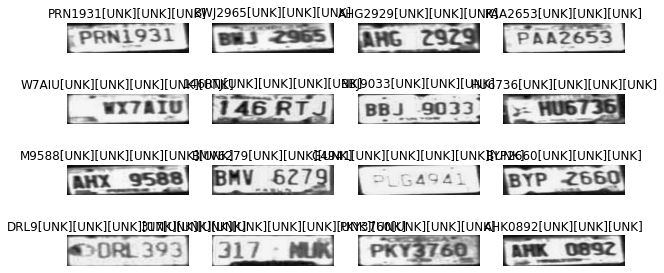

In [12]:
_, ax = plt.subplots(4, 4, figsize=(10, 5))
for batch in train_dataset.take(1):
    images = batch["image"]
    labels = batch["label"]
    for i in range(16):
        img = (images[i] * 255).numpy().astype("uint8")
        label = tf.strings.reduce_join(num_to_char(labels[i])).numpy().decode("utf-8")
        ax[i // 4, i % 4].imshow(img[:, :, 0].T, cmap="gray")
        ax[i // 4, i % 4].set_title(label)
        ax[i // 4, i % 4].axis("off")
plt.show()

### Building a CNN+RNN+CTC model:

In [13]:
class CTCLayer(layers.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred):
        # Compute the training-time loss value and add it
        # to the layer using `self.add_loss()`.
        batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
        input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
        label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

        input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)

        # At test time, just return the computed predictions
        return y_pred


def build_model():
    # Inputs to the model
    input_img = layers.Input(
        shape=(img_width, img_height, 1), name="image", dtype="float32"
    )
    labels = layers.Input(name="label", shape=(None,), dtype="float32")

    # First conv block
    x = layers.Conv2D(
        32,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv1",
    )(input_img)
    x = layers.MaxPooling2D((2, 2), name="pool1")(x)

    # Second conv block
    x = layers.Conv2D(
        64,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv2",
    )(x)
    x = layers.MaxPooling2D((2, 2), name="pool2")(x)

    # We have used two max pool with pool size and strides 2.
    # Hence, downsampled feature maps are 4x smaller. The number of
    # filters in the last layer is 64. Reshape accordingly before
    # passing the output to the RNN part of the model
    new_shape = ((img_width // 4), (img_height // 4) * 64)
    x = layers.Reshape(target_shape=new_shape, name="reshape")(x)
    x = layers.Dense(64, activation="relu", name="dense1")(x)
    x = layers.Dropout(0.2)(x)

    # RNNs
    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.25))(x)
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.25))(x)

    # Output layer
    x = layers.Dense(
        len(char_to_num.get_vocabulary()) + 1, activation="softmax", name="dense2"
    )(x)

    # Add CTC layer for calculating CTC loss at each step
    output = CTCLayer(name="ctc_loss")(labels, x)

    # Define the model
    model = keras.models.Model(
        inputs=[input_img, labels], outputs=output, name="ocr_model_v1"
    )
    # Optimizer
    opt = keras.optimizers.Adam()
    # Compile the model and return
    model.compile(optimizer=opt)
    return model


# Get the model
model = build_model()
model.summary()

Model: "ocr_model_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
image (InputLayer)              [(None, 200, 50, 1)] 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 200, 50, 32)  320         image[0][0]                      
__________________________________________________________________________________________________
pool1 (MaxPooling2D)            (None, 100, 25, 32)  0           Conv1[0][0]                      
__________________________________________________________________________________________________
Conv2 (Conv2D)                  (None, 100, 25, 64)  18496       pool1[0][0]                      
_______________________________________________________________________________________

In [14]:
# Given 100 epochs however as we used early stopping we could reach to epochs
# Our aim was to minimize the loss and validation loss.

In [15]:
epochs = 100
early_stopping_patience = 10
# Add early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=early_stopping_patience, restore_best_weights=True
)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs,
    callbacks=[early_stopping],
)

Epoch 1/100
103/103 [==============================] - 27s 186ms/step - loss: 27.0700 - val_loss: 22.1364
Epoch 2/100
103/103 [==============================] - 15s 148ms/step - loss: 21.3279 - val_loss: 21.1360
Epoch 3/100
103/103 [==============================] - 16s 150ms/step - loss: 20.8558 - val_loss: 21.0099
Epoch 4/100
103/103 [==============================] - 17s 169ms/step - loss: 20.7164 - val_loss: 20.9794
Epoch 5/100
103/103 [==============================] - 19s 180ms/step - loss: 20.6417 - val_loss: 20.8898
Epoch 6/100
103/103 [==============================] - 16s 155ms/step - loss: 20.5415 - val_loss: 20.7818
Epoch 7/100
103/103 [==============================] - 16s 154ms/step - loss: 20.4003 - val_loss: 20.5724
Epoch 8/100
103/103 [==============================] - 17s 169ms/step - loss: 20.1613 - val_loss: 20.2761
Epoch 9/100
103/103 [==============================] - 17s 165ms/step - loss: 19.9100 - val_loss: 20.0664
Epoch 10/100
103/103 [========================

### Checking the predictions:

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image (InputLayer)           [(None, 200, 50, 1)]      0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 200, 50, 32)       320       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 100, 25, 32)       0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 100, 25, 64)       18496     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 50, 12, 64)        0         
_________________________________________________________________
reshape (Reshape)            (None, 50, 768)           0         
_________________________________________________________________
dense1 (Dense)               (None, 50, 64)            49216 

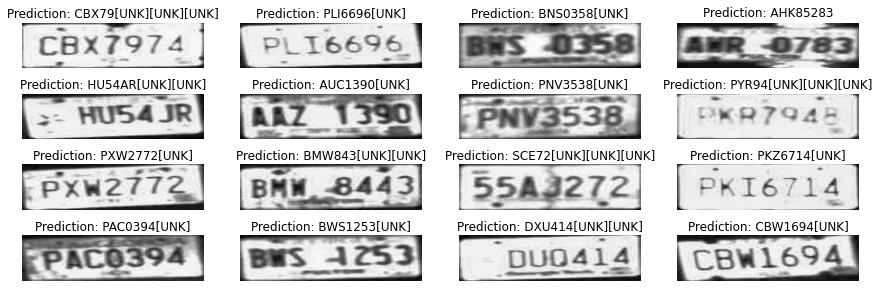

In [16]:
# Get the prediction model by extracting layers till the output layer
prediction_model = keras.models.Model(
    model.get_layer(name="image").input, model.get_layer(name="dense2").output
)
prediction_model.summary()

# A utility function to decode the output of the network
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # Use greedy search. For complex tasks, you can use beam search
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][
        :, :max_length
    ]
    # Iterate over the results and get back the text
    output_text = []
    for res in results:
        res = tf.strings.reduce_join(num_to_char(res)).numpy().decode("utf-8")
        output_text.append(res)
    return output_text


#  Let's check results on some validation samples
for batch in validation_dataset.take(1):
    batch_images = batch["image"]
    batch_labels = batch["label"]

    preds = prediction_model.predict(batch_images)
    pred_texts = decode_batch_predictions(preds)

    orig_texts = []
    for label in batch_labels:
        label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
        orig_texts.append(label)

    _, ax = plt.subplots(4, 4, figsize=(15, 5))
    for i in range(len(pred_texts)):
        img = (batch_images[i, :, :, 0] * 255).numpy().astype(np.uint8)
        img = img.T
        title = f"Prediction: {pred_texts[i]}"
        ax[i // 4, i % 4].imshow(img, cmap="gray")
        ax[i // 4, i % 4].set_title(title)
        ax[i // 4, i % 4].axis("off")
plt.show()

### Preditions on complete dataset:

In [17]:
complete_dataset = tf.data.Dataset.from_tensor_slices((np.array(img_c), np.array(lab_c)))
complete_dataset = (
    complete_dataset.map(
        encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE
    )
    .batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

In [30]:
import pandas as p
lst = []
df=pd.DataFrame()
#  Let's check results on some validation samples
for i in range(1):
    orig_texts = []
    for batch in complete_dataset.take(114):
        batch_images = batch["image"]
        batch_labels = batch["label"]

        preds = prediction_model.predict(batch_images)# Using prediction model testing it on complete dataset
        pred_texts = decode_batch_predictions(preds)

        
        for label in batch_labels:
            label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
            orig_texts.append(label)
            lst = orig_texts
df = pd.DataFrame(lst, columns = ['recognition'])

### Dataset has the predicted and actual values:

In [31]:
df.shape

(1820, 1)

In [32]:
df

,recognition
0,BHA6172[UNK][UNK][UNK]
1,BMU2999[UNK][UNK][UNK]
2,PFF9889[UNK][UNK][UNK]
3,PTA2105[UNK][UNK][UNK]
4,CCD7351[UNK][UNK][UNK]
...,...
1815,TIMKLI[UNK][UNK][UNK][UNK]
1816,PNA8367[UNK][UNK][UNK]
1817,PMC454[UNK][UNK][UNK][UNK]
1818,CBJ2486[UNK][UNK][UNK]


In [33]:
df_n1 = df.copy()

In [34]:
df = df.apply(lambda col: col.str.replace('[UNK]', ''))
df

,recognition
0,BHA6172[][][]
1,BM2999[][][]
2,PFF9889[][][]
3,PTA2105[][][]
4,CCD7351[][][]
...,...
1815,TIMLI[][][][]
1816,PA8367[][][]
1817,PMC454[][][][]
1818,CBJ2486[][][]


In [35]:
df = df.apply(lambda col: col.str.replace('[', ''))
df

,recognition
0,BHA6172]]]
1,BM2999]]]
2,PFF9889]]]
3,PTA2105]]]
4,CCD7351]]]
...,...
1815,TIMLI]]]]
1816,PA8367]]]
1817,PMC454]]]]
1818,CBJ2486]]]


In [36]:
df = df.apply(lambda col: col.str.replace(']', ''))
df

,recognition
0,BHA6172
1,BM2999
2,PFF9889
3,PTA2105
4,CCD7351
...,...
1815,TIMLI
1816,PA8367
1817,PMC454
1818,CBJ2486


In [38]:
df['VRN'] = pd.DataFrame(lab_c)
df

,recognition,VRN
0,BHA6172,BHA6172
1,BM2999,BMU2999
2,PFF9889,PFF9889
3,PTA2105,PTA2105
4,CCD7351,CCD7351
...,...,...
1815,TIMLI,TIMKLI
1816,PA8367,PNA8367
1817,PMC454,PMC454
1818,CBJ2486,CBJ2486


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1820 entries, 0 to 1819
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   recognition  1820 non-null   object
 1   VRN          1820 non-null   object
dtypes: object(2)
memory usage: 28.6+ KB


### Accuracy --> Calculate the percentage of exact matches

In [41]:
df1 = df.copy()
df1['match'] = df1['VRN'] == df1['recognition']
# calculate the percentage of exact matches
df1.match.sum()/df1.shape[0]

0.8038461538461539

### Calculate Accuracy Score for each plate:

In [42]:
### Calculate Accuracy Score for each plate:# fill na with " "
df1.fillna(' ', inplace=True)

In [43]:
from glob import glob
import difflib as dl
# define a function to calculate accurary score
def get_accuracy(row):
    if row['recognition'] == ' ':
        accuracy = 0
    else:
        matches = dl.SequenceMatcher(None, row['VRN'], row['recognition']).get_matching_blocks()
        match_count = [x[-1] for x in matches]
        accuracy = sum(match_count)/len(row['VRN'])
    return accuracy

In [44]:
df1['accuracy'] = df1.apply(lambda row: get_accuracy(row),axis=1)

In [45]:
df1.head()

,recognition,VRN,match,accuracy
0,BHA6172,BHA6172,True,1.000000
1,BM2999,BMU2999,False,0.857143
2,PFF9889,PFF9889,True,1.000000
3,PTA2105,PTA2105,True,1.000000
4,CCD7351,CCD7351,True,1.000000


In [46]:
df1['accuracy'].describe()

count    1820.000000
mean        0.968298
std         0.067315
min         0.500000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: accuracy, dtype: float64

In [47]:
df1['all_char'] = df1['VRN'].apply(lambda x:[char for char in x])

In [48]:
df1.head()

,recognition,VRN,match,accuracy,all_char
0,BHA6172,BHA6172,True,1.000000,"[B, H, A, 6, 1, 7, 2]"
1,BM2999,BMU2999,False,0.857143,"[B, M, U, 2, 9, 9, 9]"
2,PFF9889,PFF9889,True,1.000000,"[P, F, F, 9, 8, 8, 9]"
3,PTA2105,PTA2105,True,1.000000,"[P, T, A, 2, 1, 0, 5]"
4,CCD7351,CCD7351,True,1.000000,"[C, C, D, 7, 3, 5, 1]"


In [49]:
def get_match_char(row):
    all_match_char = []
    matches = dl.SequenceMatcher(None, row['VRN'], row['recognition']).get_matching_blocks()
    VRN = row['VRN']
    mylist = [match for match in matches if match[-1]!=0]
    for match in mylist:
        start = match[0]
        stop = match[0] + match[2]
        match_str = VRN[start:stop]
        match_char = [char for char in match_str]
        all_match_char += match_char
    return all_match_char

In [50]:
df1['match_char'] = df1.apply(lambda row: get_match_char(row), axis=1)

In [51]:
df1.head(10)

,recognition,VRN,match,accuracy,all_char,match_char
0,BHA6172,BHA6172,True,1.000000,"[B, H, A, 6, 1, 7, 2]","[B, H, A, 6, 1, 7, 2]"
1,BM2999,BMU2999,False,0.857143,"[B, M, U, 2, 9, 9, 9]","[B, M, 2, 9, 9, 9]"
2,PFF9889,PFF9889,True,1.000000,"[P, F, F, 9, 8, 8, 9]","[P, F, F, 9, 8, 8, 9]"
3,PTA2105,PTA2105,True,1.000000,"[P, T, A, 2, 1, 0, 5]","[P, T, A, 2, 1, 0, 5]"
4,CCD7351,CCD7351,True,1.000000,"[C, C, D, 7, 3, 5, 1]","[C, C, D, 7, 3, 5, 1]"
5,CDI4388,CDI4388,True,1.000000,"[C, D, I, 4, 3, 8, 8]","[C, D, I, 4, 3, 8, 8]"
6,PCT5326,PCT5326,True,1.000000,"[P, C, T, 5, 3, 2, 6]","[P, C, T, 5, 3, 2, 6]"
7,728JFW,728JFW,True,1.000000,"[7, 2, 8, J, F, W]","[7, 2, 8, J, F, W]"
8,PMZ8952,PMZ8952,True,1.000000,"[P, M, Z, 8, 9, 5, 2]","[P, M, Z, 8, 9, 5, 2]"
9,AGV6998,AGV6998,True,1.000000,"[A, G, V, 6, 9, 9, 8]","[A, G, V, 6, 9, 9, 8]"


In [52]:
def get_miss_char(row):
    all_char = row['all_char']
    match_char = row['match_char']
    miss_char = [char for char in all_char if char not in match_char]
    return miss_char


In [53]:
df1['miss_char'] = df1.apply(lambda row: get_miss_char(row), axis=1)

In [54]:
df1.head(10)

,recognition,VRN,match,accuracy,all_char,match_char,miss_char
0,BHA6172,BHA6172,True,1.000000,"[B, H, A, 6, 1, 7, 2]","[B, H, A, 6, 1, 7, 2]",[]
1,BM2999,BMU2999,False,0.857143,"[B, M, U, 2, 9, 9, 9]","[B, M, 2, 9, 9, 9]",[U]
2,PFF9889,PFF9889,True,1.000000,"[P, F, F, 9, 8, 8, 9]","[P, F, F, 9, 8, 8, 9]",[]
3,PTA2105,PTA2105,True,1.000000,"[P, T, A, 2, 1, 0, 5]","[P, T, A, 2, 1, 0, 5]",[]
4,CCD7351,CCD7351,True,1.000000,"[C, C, D, 7, 3, 5, 1]","[C, C, D, 7, 3, 5, 1]",[]
5,CDI4388,CDI4388,True,1.000000,"[C, D, I, 4, 3, 8, 8]","[C, D, I, 4, 3, 8, 8]",[]
6,PCT5326,PCT5326,True,1.000000,"[P, C, T, 5, 3, 2, 6]","[P, C, T, 5, 3, 2, 6]",[]
7,728JFW,728JFW,True,1.000000,"[7, 2, 8, J, F, W]","[7, 2, 8, J, F, W]",[]
8,PMZ8952,PMZ8952,True,1.000000,"[P, M, Z, 8, 9, 5, 2]","[P, M, Z, 8, 9, 5, 2]",[]
9,AGV6998,AGV6998,True,1.000000,"[A, G, V, 6, 9, 9, 8]","[A, G, V, 6, 9, 9, 8]",[]


In [55]:
# combine all matched characters
all_matches = []
for i in range(df1.shape[0]):
    all_matches += df1.iloc[i,5]

In [56]:
# count the matched charaters
for count, char in sorted(((all_matches.count(char), char) for char in set(all_matches)), reverse=True):
    print(f'count of {char}: {count}')

count of 3: 774
count of P: 752
count of 2: 723
count of 6: 708
count of 4: 698
count of 8: 689
count of 1: 687
count of 9: 674
count of 5: 659
count of 7: 634
count of 0: 621
count of C: 590
count of B: 584
count of A: 447
count of D: 241
count of G: 182
count of W: 179
count of F: 170
count of T: 163
count of H: 154
count of J: 153
count of L: 152
count of Z: 150
count of M: 144
count of Y: 140
count of E: 139
count of S: 129
count of I: 128
count of V: 125
count of R: 102
count of X: 95
count of Q: 82
count of O: 8
count of w: 1


In [57]:
# combine all missed characters
all_misses = []
for i in range(df1.shape[0]):
    all_misses += df1.iloc[i, 6]

# count the missed charaters
for count, char in sorted(((all_misses.count(char), char) for char in set(all_misses)), reverse=True):
    print(f'count of {char}: {count}') 

count of N: 151
count of K: 125
count of U: 113


### Boxplot showing Accuracy:

<AxesSubplot:>

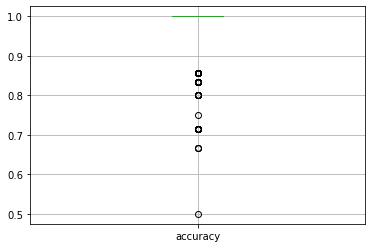

In [58]:
df1.boxplot(column=['accuracy'])

In [59]:
df1['miss_one'] = df1['miss_char'].map(lambda x: len(x)==1)

In [60]:
df1['miss_one'].sum()/df1.shape[0]

0.17857142857142858

In [61]:
(df1['miss_one'].sum() + df1['match'].sum())/df1.shape[0]

0.9824175824175824

### Exploration of predictions:

In [64]:
df1['path'] = img_c
df1

,recognition,VRN,match,accuracy,all_char,match_char,miss_char,miss_one,path
0,BHA6172,BHA6172,True,1.000000,"[B, H, A, 6, 1, 7, 2]","[B, H, A, 6, 1, 7, 2]",[],False,ir_patch\processed_new\14134_19700101194928245...
1,BM2999,BMU2999,False,0.857143,"[B, M, U, 2, 9, 9, 9]","[B, M, 2, 9, 9, 9]",[U],True,ir_patch\processed_new\14135_19700101195631172...
2,PFF9889,PFF9889,True,1.000000,"[P, F, F, 9, 8, 8, 9]","[P, F, F, 9, 8, 8, 9]",[],False,ir_patch\processed_new\14136_19700101195849178...
3,PTA2105,PTA2105,True,1.000000,"[P, T, A, 2, 1, 0, 5]","[P, T, A, 2, 1, 0, 5]",[],False,ir_patch\processed_new\14137_19700101200204933...
4,CCD7351,CCD7351,True,1.000000,"[C, C, D, 7, 3, 5, 1]","[C, C, D, 7, 3, 5, 1]",[],False,ir_patch\processed_new\14140_19700101200442871...
...,...,...,...,...,...,...,...,...,...
1815,TIMLI,TIMKLI,False,0.833333,"[T, I, M, K, L, I]","[T, I, M, L, I]",[K],True,ir_patch\processed_new\16647_19700101183650543...
1816,PA8367,PNA8367,False,0.857143,"[P, N, A, 8, 3, 6, 7]","[P, A, 8, 3, 6, 7]",[N],True,ir_patch\processed_new\16649_19700101184032831...
1817,PMC454,PMC454,True,1.000000,"[P, M, C, 4, 5, 4]","[P, M, C, 4, 5, 4]",[],False,ir_patch\processed_new\16650_19700101184334265...
1818,CBJ2486,CBJ2486,True,1.000000,"[C, B, J, 2, 4, 8, 6]","[C, B, J, 2, 4, 8, 6]",[],False,ir_patch\processed_new\16651_19700101184714969...


In [65]:
df1.dtypes

recognition     object
VRN             object
match             bool
accuracy       float64
all_char        object
match_char      object
miss_char       object
miss_one          bool
path            object
dtype: object

In [66]:
df1['image'] = df1['path']
df1.dtypes

recognition     object
VRN             object
match             bool
accuracy       float64
all_char        object
match_char      object
miss_char       object
miss_one          bool
path            object
image           object
dtype: object

In [67]:
df1['image'] = df1['image'].apply(lambda col: col.replace('\\processed_new', '\\'))
df1.head()

,recognition,VRN,match,accuracy,all_char,match_char,miss_char,miss_one,path,image
0,BHA6172,BHA6172,True,1.000000,"[B, H, A, 6, 1, 7, 2]","[B, H, A, 6, 1, 7, 2]",[],False,ir_patch\processed_new\14134_19700101194928245...,ir_patch\\14134_19700101194928245_BHA6172_1_ir...
1,BM2999,BMU2999,False,0.857143,"[B, M, U, 2, 9, 9, 9]","[B, M, 2, 9, 9, 9]",[U],True,ir_patch\processed_new\14135_19700101195631172...,ir_patch\\14135_19700101195631172_BMU2999_1_ir...
2,PFF9889,PFF9889,True,1.000000,"[P, F, F, 9, 8, 8, 9]","[P, F, F, 9, 8, 8, 9]",[],False,ir_patch\processed_new\14136_19700101195849178...,ir_patch\\14136_19700101195849178_PFF9889_1_ir...
3,PTA2105,PTA2105,True,1.000000,"[P, T, A, 2, 1, 0, 5]","[P, T, A, 2, 1, 0, 5]",[],False,ir_patch\processed_new\14137_19700101200204933...,ir_patch\\14137_19700101200204933_PTA2105_1_ir...
4,CCD7351,CCD7351,True,1.000000,"[C, C, D, 7, 3, 5, 1]","[C, C, D, 7, 3, 5, 1]",[],False,ir_patch\processed_new\14140_19700101200442871...,ir_patch\\14140_19700101200442871_CCD7351_1_ir...


In [68]:
df1['image'] = df1['image'].apply(lambda col: col.replace('\\\\', '\\'))
df1.head()

,recognition,VRN,match,accuracy,all_char,match_char,miss_char,miss_one,path,image
0,BHA6172,BHA6172,True,1.000000,"[B, H, A, 6, 1, 7, 2]","[B, H, A, 6, 1, 7, 2]",[],False,ir_patch\processed_new\14134_19700101194928245...,ir_patch\14134_19700101194928245_BHA6172_1_ir_...
1,BM2999,BMU2999,False,0.857143,"[B, M, U, 2, 9, 9, 9]","[B, M, 2, 9, 9, 9]",[U],True,ir_patch\processed_new\14135_19700101195631172...,ir_patch\14135_19700101195631172_BMU2999_1_ir_...
2,PFF9889,PFF9889,True,1.000000,"[P, F, F, 9, 8, 8, 9]","[P, F, F, 9, 8, 8, 9]",[],False,ir_patch\processed_new\14136_19700101195849178...,ir_patch\14136_19700101195849178_PFF9889_1_ir_...
3,PTA2105,PTA2105,True,1.000000,"[P, T, A, 2, 1, 0, 5]","[P, T, A, 2, 1, 0, 5]",[],False,ir_patch\processed_new\14137_19700101200204933...,ir_patch\14137_19700101200204933_PTA2105_1_ir_...
4,CCD7351,CCD7351,True,1.000000,"[C, C, D, 7, 3, 5, 1]","[C, C, D, 7, 3, 5, 1]",[],False,ir_patch\processed_new\14140_19700101200442871...,ir_patch\14140_19700101200442871_CCD7351_1_ir_...


### Why "N" is the top missed character(CNN)?

In [70]:
# label the recognitions where '1' was not correctly recognized.
df1['miss_1'] = df1['miss_char'].apply(lambda x: "N" in x)

In [71]:
# select these recognitions
temp = df1[df1['miss_1']==True]

In [72]:
temp.head()

,recognition,VRN,match,accuracy,all_char,match_char,miss_char,miss_one,path,image,miss_1
26,P1754,PKN1754,False,0.714286,"[P, K, N, 1, 7, 5, 4]","[P, 1, 7, 5, 4]","[K, N]",False,ir_patch\processed_new\14166_19700101214626344...,ir_patch\14166_19700101214626344_PKN1754_1_ir_...,True
29,PI2531,PIN2531,False,0.857143,"[P, I, N, 2, 5, 3, 1]","[P, I, 2, 5, 3, 1]",[N],True,ir_patch\processed_new\14169_19700101215653738...,ir_patch\14169_19700101215653738_PIN2531_1_ir_...,True
33,PR1931,PRN1931,False,0.857143,"[P, R, N, 1, 9, 3, 1]","[P, R, 1, 9, 3, 1]",[N],True,ir_patch\processed_new\14173_19700101223325265...,ir_patch\14173_19700101223325265_PRN1931_1_ir_...,True
42,PR3680,PRN3680,False,0.857143,"[P, R, N, 3, 6, 8, 0]","[P, R, 3, 6, 8, 0]",[N],True,ir_patch\processed_new\14186_19700101234358367...,ir_patch\14186_19700101234358367_PRN3680_1_ir_...,True
95,THEEL,NTHEEL,False,0.833333,"[N, T, H, E, E, L]","[T, H, E, E, L]",[N],True,ir_patch\processed_new\14258_19700101121447460...,ir_patch\14258_19700101121447460_NTHEEL_1_ir_p...,True


ir_patch\14576_19700101214500179_WF9N55_1_ir_patch.jpg
ir_patch\14644_19700101113908917_PNT7481_1_ir_patch.jpg
ir_patch\14656_19700101115106004_BSN5835_1_ir_patch.jpg
ir_patch\14677_19700101121249235_452NEC_1_ir_patch.jpg
ir_patch\14680_19700101121443679_BBN0976_1_ir_patch.jpg
ir_patch\14684_19700101121818706_BBN0433_1_ir_patch.jpg
ir_patch\14708_19700101123610476_PNW7855_1_ir_patch.jpg
ir_patch\14711_19700101123941740_BZN3703_1_ir_patch.jpg
ir_patch\14724_19700101124844126_NKE7_1_ir_patch.jpg


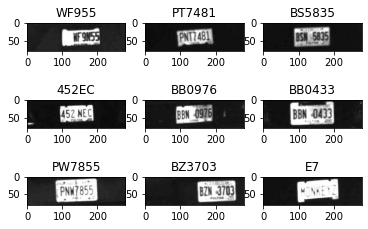

In [74]:
# show some of the VRN plates with no 'N' charater
for i in range(9):
    plt.subplot(330+1+i)
    filename = temp.iloc[i+35,9]
    print(filename)
    image = cv2.imread(filename)
    plt.imshow(image,cmap = 'gray')
    plt.title(temp.iloc[i+35,0])
plt.show()

### Why "K" is the top missed character(CNN)?

In [76]:
# label the recognitions where '1' was not correctly recognized.
df1['miss_1'] = df1['miss_char'].apply(lambda x: "K" in x)

In [77]:
# select these recognitions
temp = df1[df1['miss_1']==True]

ir_patch\14856_19700101165623253_PKQ9247_1_ir_patch.jpg
ir_patch\14868_19700101173228044_PKV4477_1_ir_patch.jpg
ir_patch\14988_19700101183524020_PIK8775_1_ir_patch.jpg
ir_patch\15009_19700101193822511_PKS8853_1_ir_patch.jpg
ir_patch\15023_19700101195819551_PKN3500_1_ir_patch.jpg
ir_patch\15053_19700101205847826_BKY4786_1_ir_patch.jpg
ir_patch\15077_19700101214312898_CBK4583_1_ir_patch.jpg
ir_patch\15090_19700101215438305_DKC710_1_ir_patch.jpg
ir_patch\15096_19700101220325180_KR794R_1_ir_patch.jpg


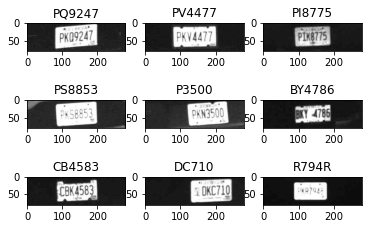

In [78]:
# show some of the VRN plates with no 'K' charater
for i in range(9):
    plt.subplot(330+1+i)
    filename = temp.iloc[i+35,9]
    print(filename)
    image = cv2.imread(filename)
    plt.imshow(image,cmap = 'gray')
    plt.title(temp.iloc[i+35,0])
plt.show()

-- Why there are no matches at all?

In [79]:
# label recognitions with no matches at all
df1['no_match'] = df1['match_char'].apply(lambda x: len(x)==0)

In [80]:
# select these recognitions
temp = df1[df1['no_match']==True]

In [81]:
temp # We can observe there are no images with no match at all

,recognition,VRN,match,accuracy,all_char,match_char,miss_char,miss_one,path,image,miss_1,no_match


-- Checking if elements are falsely recognized as a character?

In [82]:
df1['longer'] = df1.apply(lambda x: len(x['recognition'])>len(x['VRN']),axis=1)

In [83]:
df1.longer.sum()

0